In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 9</span>

### Algoritmi genetici e il Traveling Salesman Problem

Gli algoritmi genetici sono degli algoritmi di tipo metaeuristico che applicano le regole dell'evoluzione e della selezione naturale a problemi di ottimizzazione. 
Gli oggetti su cui lavora l'algoritmo sono i **cromosomi**: essi, così come in genetica, sono formati da sequenze di **geni** i quali possono comparire sottoforma di **alleli** diversi. La riproduzione avviene tramite la generazione di due cromosomi figli partendo da due genitori iniziali; affinché sia rispettata la regola della selezione naturale e ci sia inoltre sufficiente variabilità genetica, vengono applicati diversi operatori genetici: l'operatore di *selezione*, il *crossover*, e le *mutazioni*.

- L'operatore di selezione permette la scelta dei $2$ individui che andranno a riprodursi facendo in modo che, di tutta la popolazione, gli individui migliori (secondo un certo criterio) abbiano maggiori possibilità di riprodursi. Se nessun operatore di variazione genetica viene applicato, i figli ottenuti dai genitori saranno le loro stesse copie.
- L'operatore di crossover mima la ricombinazione che avviene tra due cromosomi di un organismo, scambiando due sottoparti dei due cromosomi genitori. 
- L'operatore di mutazione produce una diversità nella popolazione, modificando i valori degli alleli in una parte del cromosoma.

A questo punto, chiamando l'operatore di selezione un numero adeguato di volte, si potrà creare una nuova **generazione**, ovvero si potrà sostituire la popolazione iniziale con la nuova popolazione di figli generata tramite selezione, crossover e mutazione. Grazie alle diversità inserite si riusciranno a trovare individui sempre migliori lungo varie generazioni, riuscendo ad ottimizzare il problema di partenza.

#### Traveling Salesman Problem (TSP)

Esempio di applicazione di algoritmi genetici è quello del Traveling Salesman Problem: il problema consiste in un commesso viaggiatore che deve visitare un certo numero _n_ di città distribuite in modo random. L'ottimizzazione del problema consiste nel trovare la strada più corta che può essere percorsa soddisfando alcuni vincoli:
- Ogni città dev'essere visitata una sola volta
- La città di arrivo finale dev'essere la stessa città di partenza

Se $\vec{x} = {1,...,n}$ sono le diverse città da visitare, la distanza minima percorsa in totale si trova calcolando una funzione di costo 
$L(\vec{x}) = \sum_{i = 1}^n d(x_i, x_{i+1})$ da minimizzare, dove $d(x_i, x_{i+1})$ è la distanza tra due città $x_i, x_{i+1}$. Per questo tipo di problema di ottimizzazione la funzione di costo $L(\vec{x})$ possiede molti minimi locali.

Il problema è un problema di ottimizzazione di tipo combinatorio: esiste un numero finito di possibili percorsi unici, e  per un numero di città $n \geq 3$ esso equivale a $\frac{(n-1)!}{2}$.

### Esercizio 9.01

Viene creato un algoritmo genetico che possa risolvere i seguenti problemi TSP:

- Calcolo della minima distanza percorsa nel visitare $32$ città poste su una circonferenza
- Calcolo della minima distanza percorsa nel visitare $32$ città poste all'interno di un quadrato

In entrambi i casi vengono rispettati i seguenti vincoli:
- La città di partenza (equivalente alla città finale) viene posta sempre in posizione $1$, in modo da diminuire la degenerazione del percorso più corto a $2$
- Ogni città del percorso viene visitata una volta soltanto

Si è scelto di rappresentare il percorso tramite un vettore $1D$ formato da interi che identificano l'ordine in cui le città vengono visitate dal commesso in quel determinato percorso. La funzione di costo viene rappresentata tramite una norma $L_1$:
$$
L_1(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
con $\vec{x}_{N+1}=\vec{x}_1$. L'obiettivo è trovare il percorso che minimizzi la funzione di costo; la ricerca viene fatta utilizzando un algoritmo genetico in cui le città identificano i geni, i quali sono rappresentati da diversi alleli (ovvero le diverse città che possono essere visitate), e in cui ogni percorso identifica un cromosoma del problema.
Creata una popolazione di cromosomi iniziale random che segua i vincoli del problema, essa viene ordinata tramite una funzione di **Fitness** secondo la cost function associata al particolare cromosoma in modo crescente. 
Successivamente vengono applicati degli operatori genetici: l'operatore di selezione sceglie un numero intero tramite un algoritmo $j=N\times int(r^p)$ dove $r\in[0,1)$ è un numero random uniforme e $p = 2.5$. I numeri generati mi daranno gli indici secondo i quali scegliere i cromosomi della popolazione che diventeranno genitori dei nuovi discendenti. Il valore di $p$ è tale per cui i cromosomi appartenenti alla prima metà della popolazione, ovvero quelli con una fitness migliore, abbiano più probabilità di essere scelti. Come si può vedere dal seguente grafico, con un valore di $p = 2.5$ qualsiasi numero random $r$ generato che sia compreso tra $[0, 0.8)$ genererà un indice che ricadrà nella prima metà della popolazione.

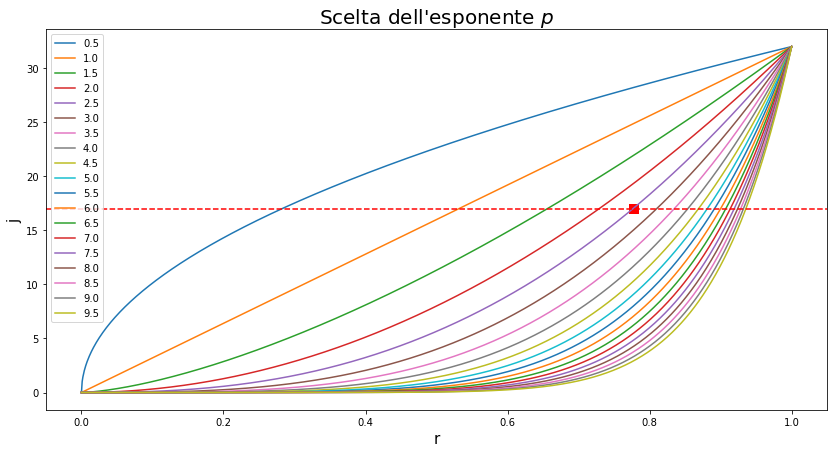

In [23]:
plt.figure(figsize=(14,7))
p = np.arange(0.5, 10, 0.5)
r = np.linspace(0,1,1000)
N = 32
for i in p:
    plt.plot(r, N*r**i, label = i)
    
plt.legend()
plt.axhline(y=17, linestyle = '--', color = 'r')
plt.vlines(x=0.778, ymin = 16.5, ymax = 18, linestyle = 'dotted', color = 'red', linewidth = 10 )
plt.xlabel("r", fontsize = 15)
plt.ylabel("j", fontsize = 15)
plt.title("Scelta dell'esponente $p$", fontsize = 20)
plt.show()


Ai cromosomi scelti viene applicato un operatore di crossover, chiamato con $P_c > 70 \%$, il quale opera tagliando i due cromosomi in uno stesso punto e aggiungendo nel primo i geni del consorte nell'ordine in cui appaiono in esso e viceversa, facendo attenzione che non vi siano geni ripetuti. Infine si applicano degli operatori di mutazione, chiamati con $P_m < 10 \%$: 
- Operatore **pair permutation**: applica una permutazione tra due città contigue, eccetto la prima. Ciò viene implementato tramite la funzione *std::swap* appartenente alla libreria "algorithm" del C++
- Operatore **inversion permutation**: definendo _m_ città del percorso ($m \leq N$) in modo random, inverte l'ordine in cui esse appaiono nel cromosoma (ad eccezione della prima). Ciò viene implementato tramite la funzione *std::reverse* appartenente alla libreria "algorithm" del C++
- Operatore **contiguous permutation**: definendo _m_ città del percorso ($m < \frac{N}{2}$) in modo random, applica una permutazione tra le _m_ città scelte (ad eccezione della prima) con altre _m_ città contigue. Ciò viene implementato tramite la funzione *std::rotate* appartenente alla libreria "algorithm" del C++
- Operatore **shift mutation**: definendo _m_ città del percorso ($m < \frac{N}{2}$) in modo random, l'operatore sposta le prime _m_ città del vettore contenente il percorso totale (ad eccezione della prima) in fondo ad esso.

Iterando il procedimento viene creata una nuova generazione. Vengono create varie generazioni, ognuna contenente una popolazione di $100$ cromosomi formati da $32$ geni.
Il procedimento viene implementato attraverso OOP, implementando tre classi: _Cities_, contenente i metodi per la creazione dei geni e il calcolo della distanza tramite norma $L_1$; _Path_, contenente i metodi per la creazione e la manipolazione dei cromosomi; _NewGeneration_, contenente i metodi per la creazione di una nuova generazione di individui. In particolare in quest'ultima classe si trovano i metodi che implementano il crossover e le mutazioni.

#### Città su una circonferenza

Si suppone di avere 32 città poste su una circonferenza di raggio $r=10$. Il percorso minimo compiuto, partendo dalla città numero 1, per visitare tutte le altre città ritornando a quella di partenza dev'essere minore del perimetro della circonferenza ovvero $2p = 2\pi r \leq 62,83$. 

Inizialmente, dopo aver generato la popolazione iniziale ed averla ordinata grazie alla funzione di fitness, il miglior percorso compiuto dal commesso viaggiatore (ovvero quello a cui è associata la cost function minore), è il seguente:

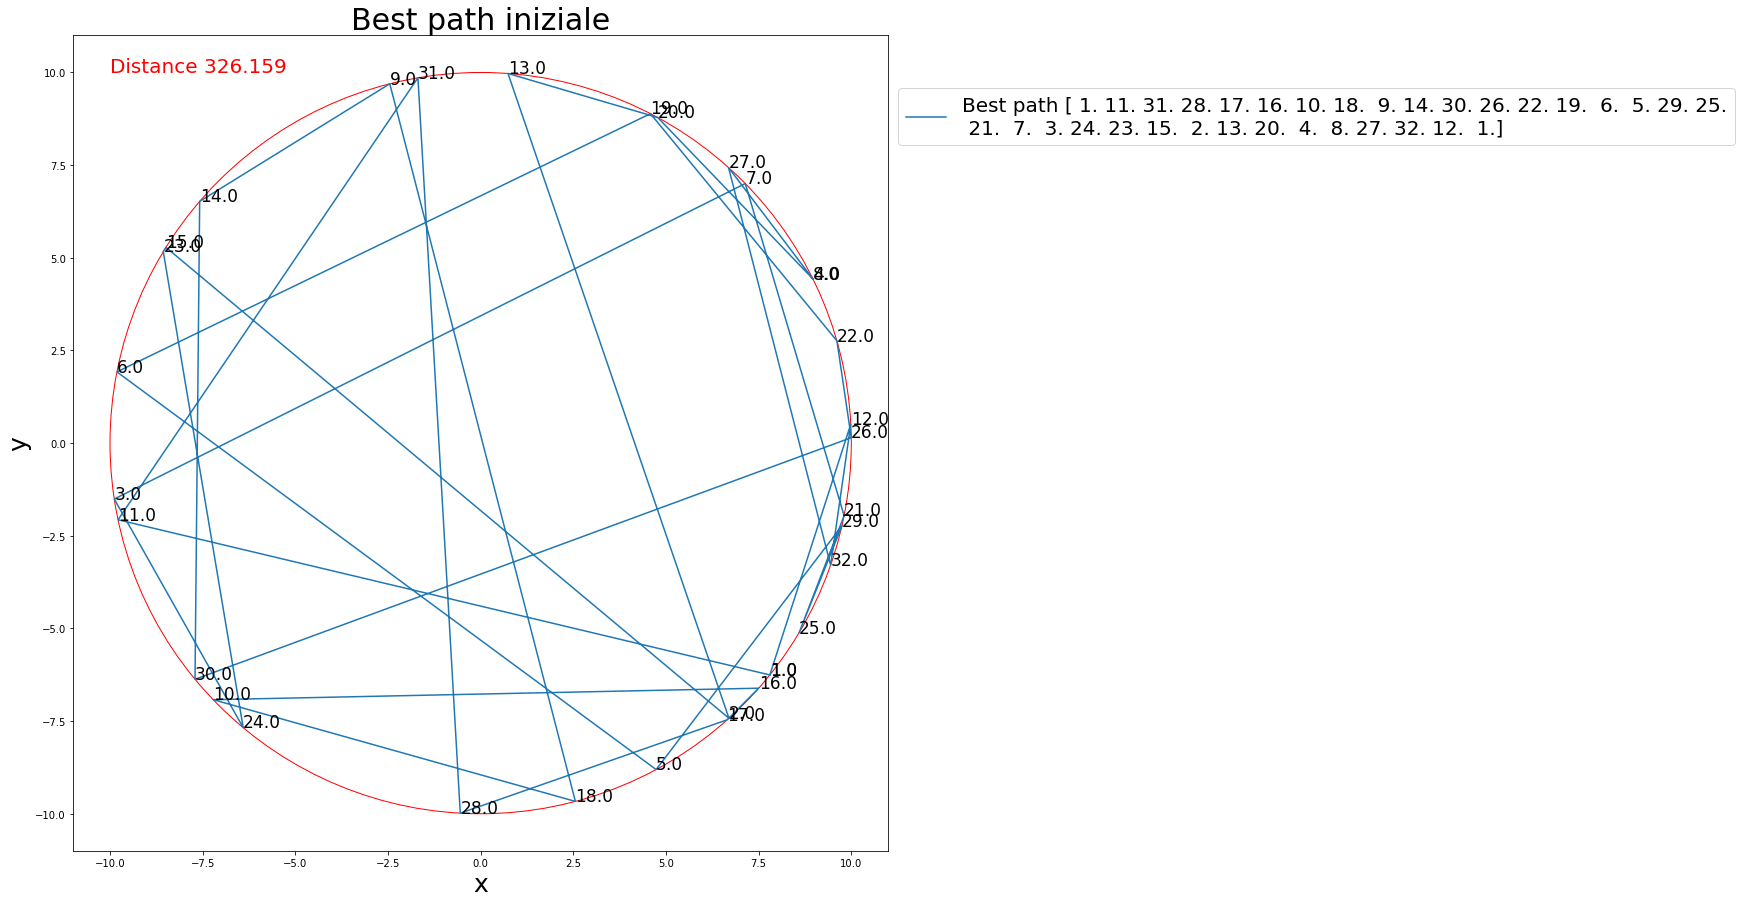

In [3]:
plt.figure(figsize = (15,15))
coord_x, coord_y, name, dist = np.loadtxt("oldpath.dat", usecols = (0, 1, 2, 3), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

plt.legend(loc="center left", bbox_to_anchor=(1., 0.9), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Distance {}".format(dist[0]), (-10.0,10.0), fontsize = 20, color = "red")
plt.title("Best path iniziale", fontsize = 30)

plt.show()

Vengono successivamente create nuove generazioni grazie all'applicazione degli operatori genetici precedentemente illustrati.

Nei seguenti grafici vengono mostrati i best path compiuti dopo un certo numero di generazioni, mostrando come essi migliorino all'aumentare delle stesse.

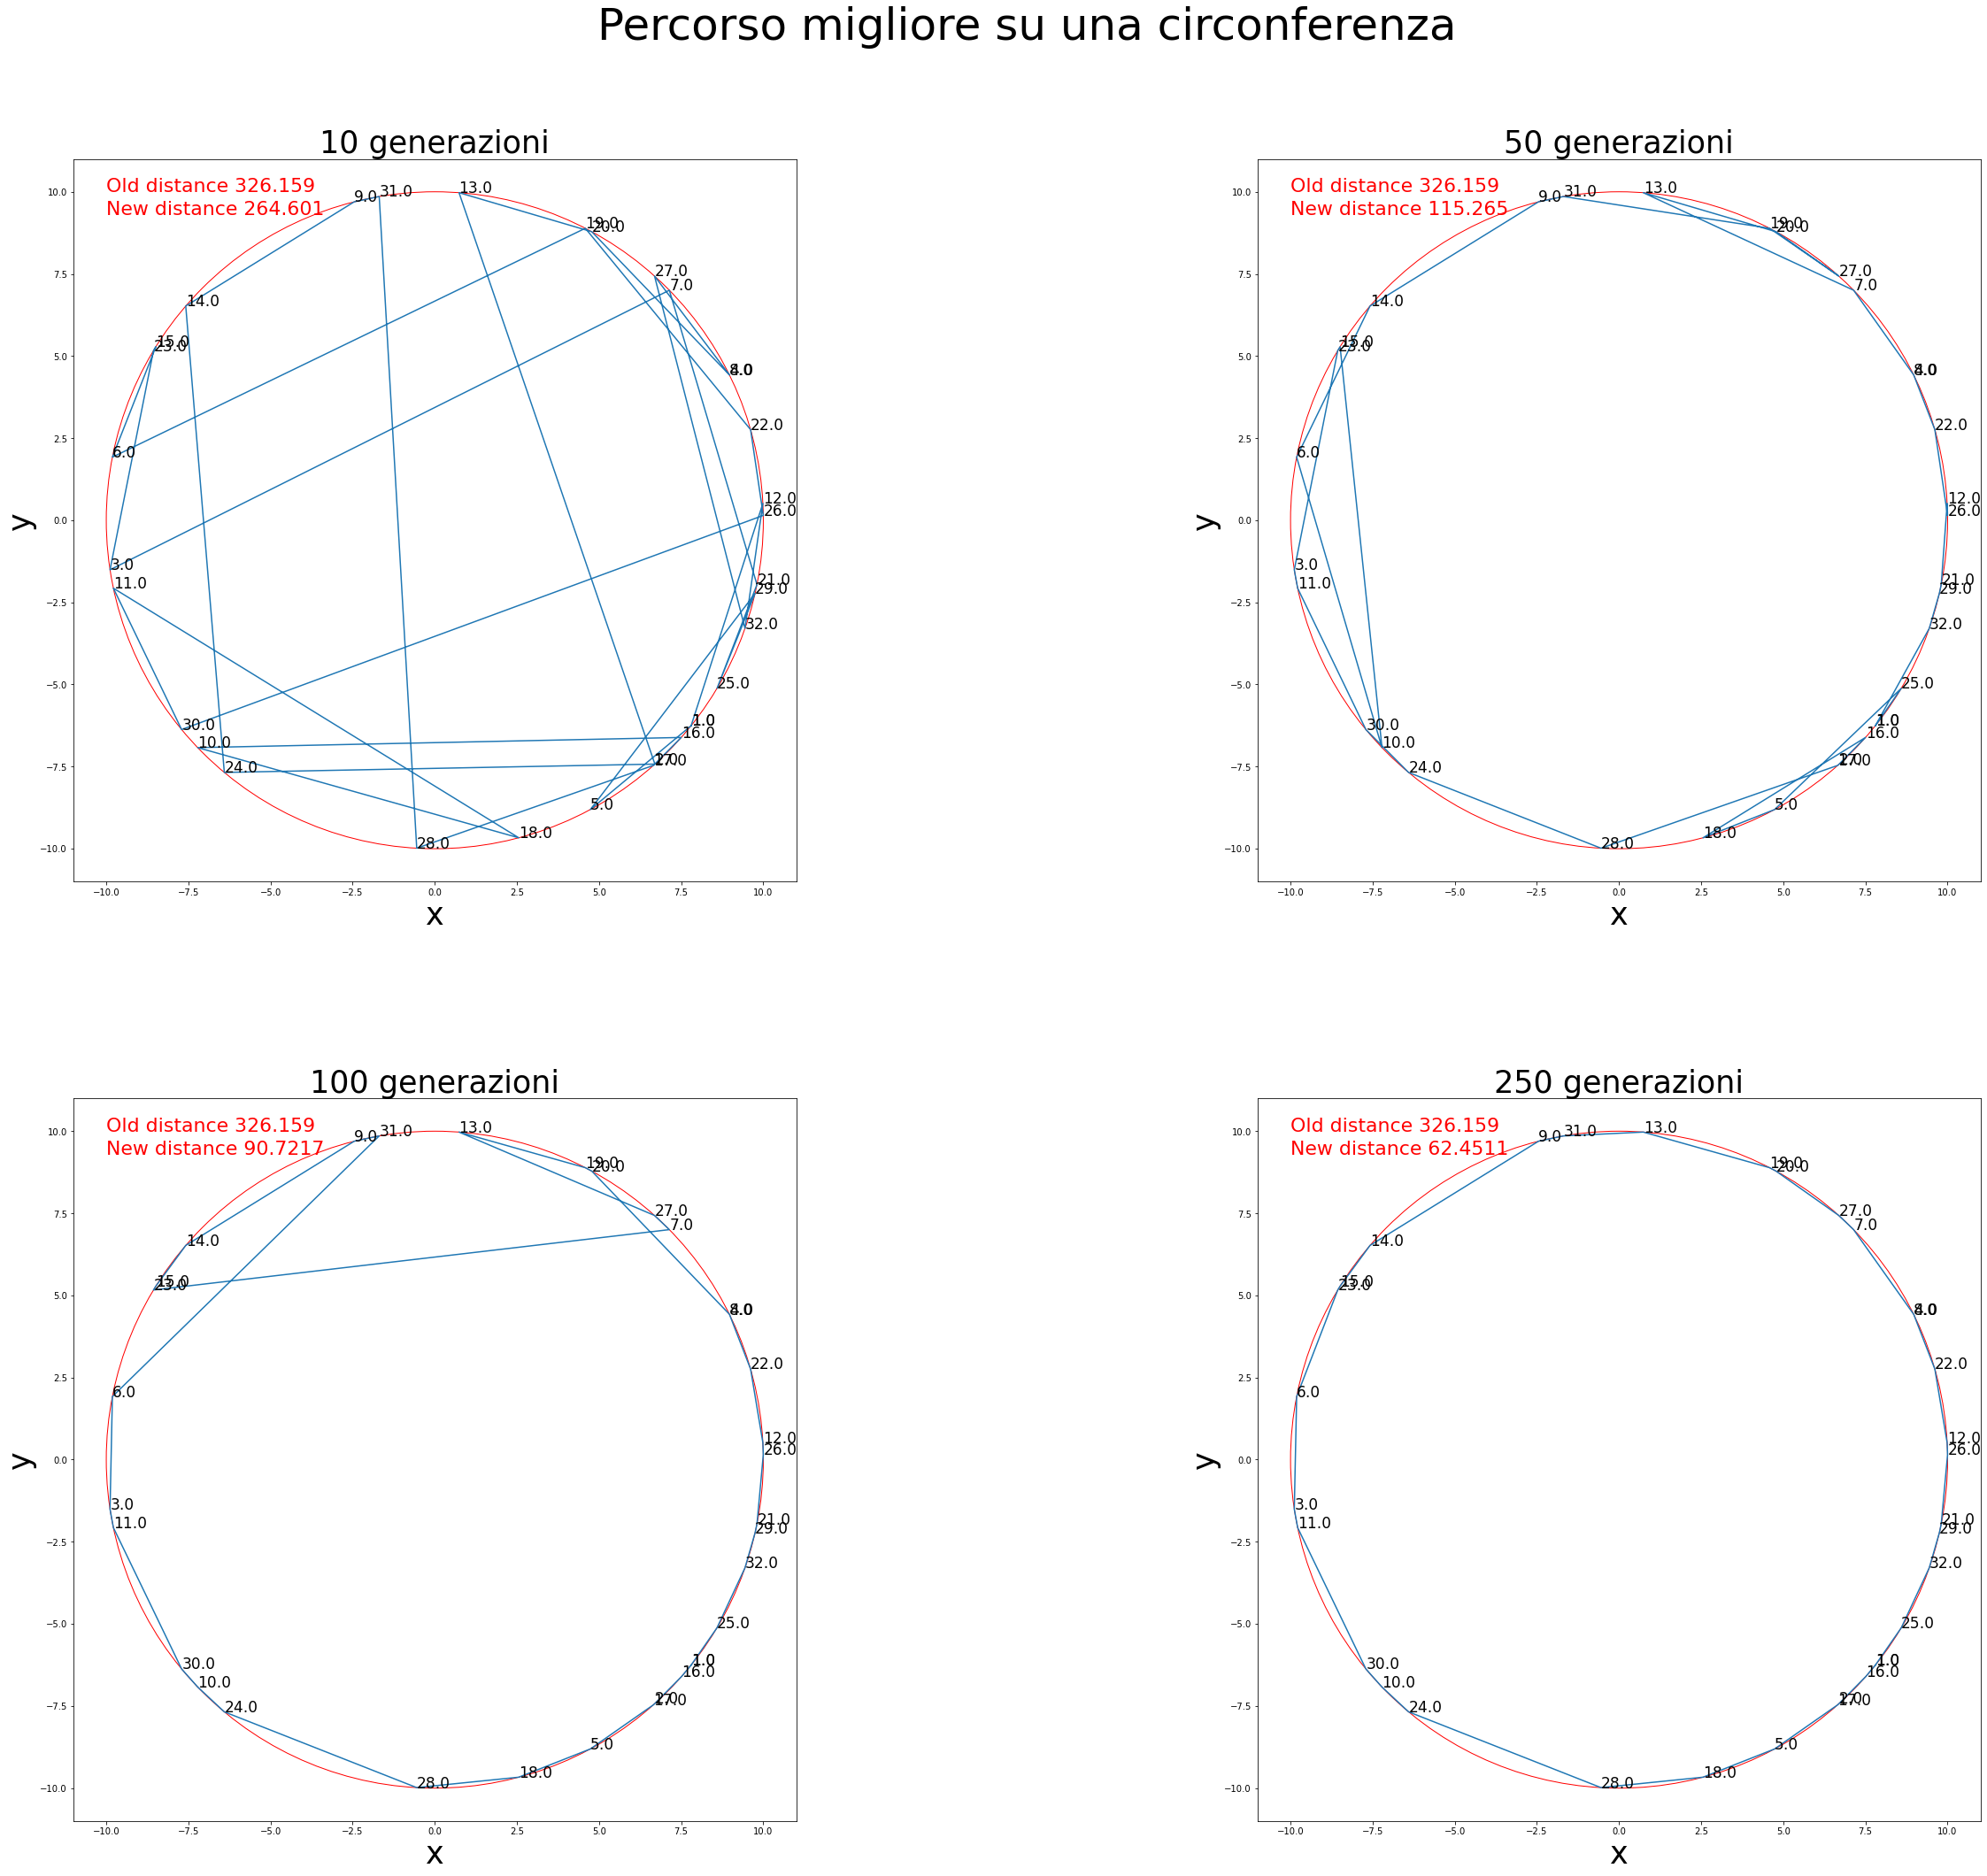

In [4]:
plt.figure(figsize=(40,30))

plt.subplot(2,2,1)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("10 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)
    
#plt.legend(loc="center left", bbox_to_anchor=(0.73, 1.), fontsize = 20)

plt.xlabel("x", fontsize = 35)
plt.ylabel("y", fontsize = 35)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 22, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 22, color = "red")
plt.title("10 generazioni", fontsize = 35)

plt.subplot(2,2,2)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("50 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)
    
#plt.legend(loc="center left", bbox_to_anchor=(0.75, 1.), fontsize = 20)

plt.xlabel("x", fontsize = 35)
plt.ylabel("y", fontsize = 35)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 22, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 22, color = "red")
plt.title("50 generazioni", fontsize = 35)


plt.subplot(2,2,3)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("100 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(0.73, 1.), fontsize = 20)

plt.xlabel("x", fontsize = 35)
plt.ylabel("y", fontsize = 35)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 22, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 22, color = "red")
plt.title("100 generazioni", fontsize = 35)


plt.subplot(2,2,4)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("250 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(0.75, 1.), fontsize = 20)

plt.xlabel("x", fontsize = 35)
plt.ylabel("y", fontsize = 35)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 22, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 22, color = "red")
plt.title("250 generazioni", fontsize = 35)


plt.suptitle("Percorso migliore su una circonferenza", fontsize = 50)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()


Già dopo $50$ generazioni vi è un netto miglioramento rispetto al percorso migliore compiuto nella popolazione di partenza, a cui non erano stati applicati operatori genetici.
All'aumentare delle generazioni, inoltre, vi è una diminuzione degli incroci lungo il percorso il quale tende sempre più a giacere sulla circonferenza. 

Il percorso migliore su una circonferenza si ha dopo $250$ generazioni: nel caso studiato si è partiti da una cost function iniziale $L_1 = 326,159$ per la prima popolazione generata e si è arrivati a minimizzarla, grazie agli operatori genetici, fino a $L_1 = 62,4511$.

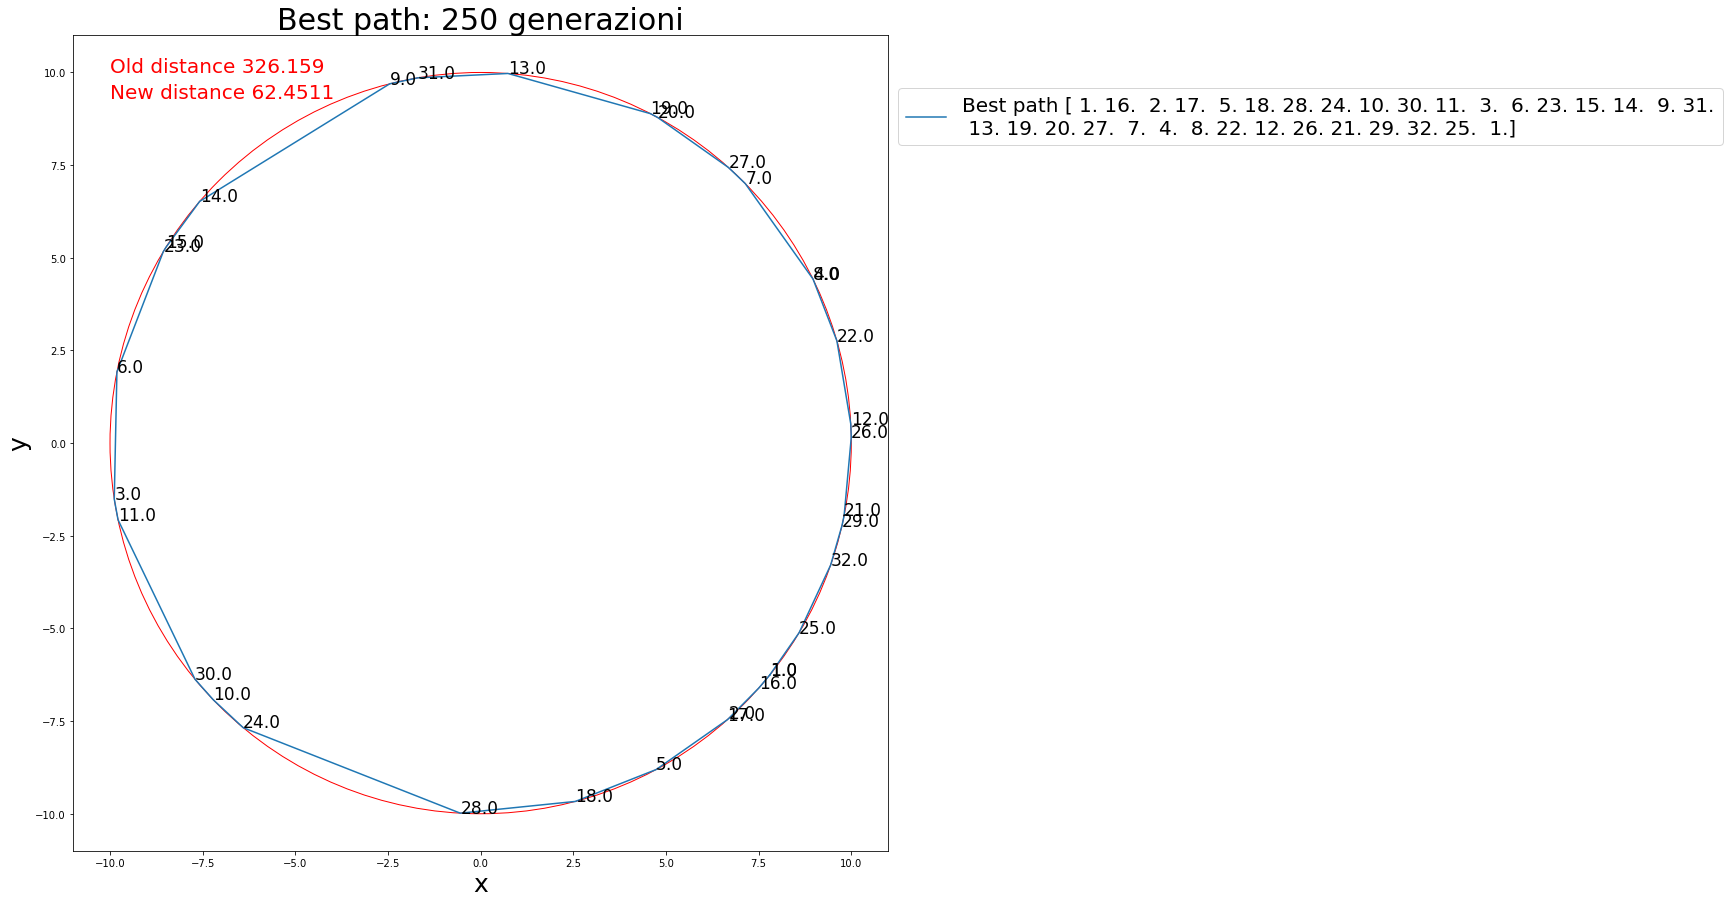

In [5]:
plt.figure(figsize = (15,15))
coord_x, coord_y, name, dist, old_dist = np.loadtxt("250 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

plt.legend(loc="center left", bbox_to_anchor=(1., 0.9), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 20, color = "red")
plt.title("Best path: 250 generazioni", fontsize = 30)

plt.show()

Anche aumentando ulteriormente il numero di generazioni la distanza minima non varia, restando pari a $L_1 = 62,4511$: è stato probabilmente raggiunto il minimo globale del sistema.

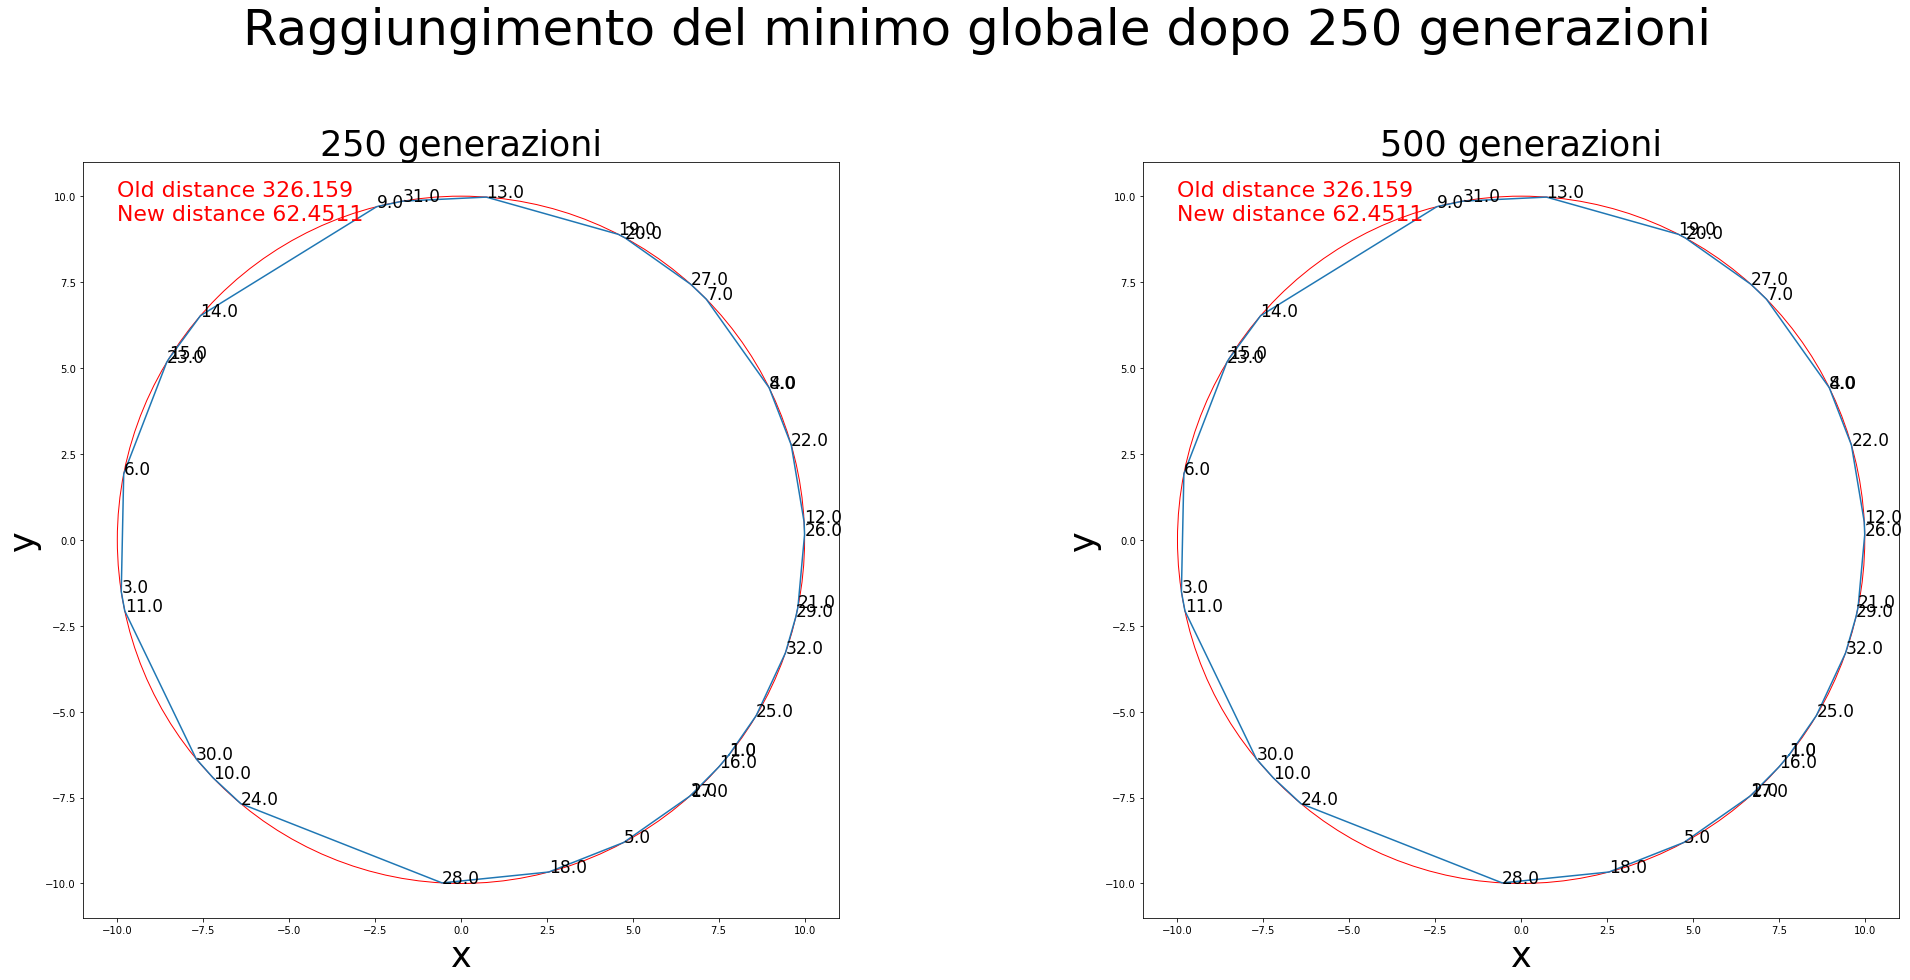

In [3]:
plt.figure(figsize=(30,27))

plt.subplot(2,2,1)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("250 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)
    
#plt.legend(loc="center left", bbox_to_anchor=(0.73, 1.), fontsize = 20)

plt.xlabel("x", fontsize = 35)
plt.ylabel("y", fontsize = 35)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 22, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 22, color = "red")
plt.title("250 generazioni", fontsize = 35)

plt.subplot(2,2,2)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("500 gen/bestpath.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
circle = plt.Circle((0,0), 10.0, ec = "red", fill = False)
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)
    
#plt.legend(loc="center left", bbox_to_anchor=(0.75, 1.), fontsize = 20)

plt.xlabel("x", fontsize = 35)
plt.ylabel("y", fontsize = 35)
plt.annotate("Old distance {}".format(old_dist[0]), (-10.0,10.0), fontsize = 22, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-10.0, 9.3), fontsize = 22, color = "red")
plt.title("500 generazioni", fontsize = 35)

plt.suptitle("Raggiungimento del minimo globale dopo 250 generazioni", fontsize = 50)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()


Vengono inoltre mostrati gli andamenti della norma $L_1$ per il percorso migliore e della media $\langle L_1 \rangle$ (mediata sulla metà migliore della popolazione) al variare delle generazioni.

Si può notare come, all'aumentare delle generazioni, si abbia un'ottimizzazione progressiva della cost function; essa diminuisce velocemente lungo le prime $100$ generazioni, dove grazie all'effetto degli operatori genetici viene generata grande varietà nella popolazione di cromosomi, portando rapidamente a valori minori della cost function. Può capitare che la cost function raggiunga dei minimi locali, nel qual caso possono essere necessarie molte generazioni per fare in modo che essa riesca ad esplorare un minimo successivo.

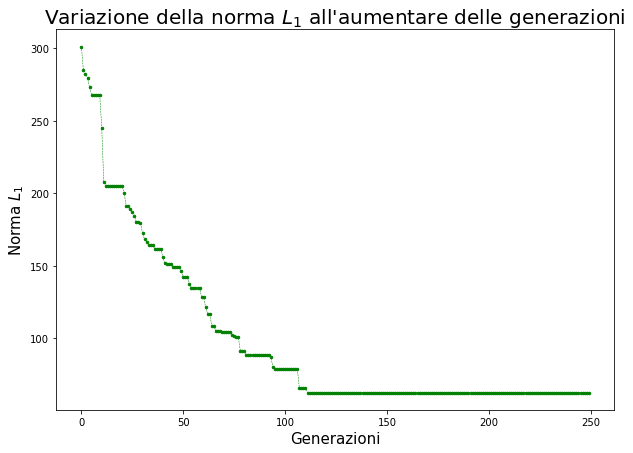

In [6]:
plt.figure(figsize=(10,7))
gen, L1 = np.loadtxt("250 gen/L1.dat", usecols = (0, 1), unpack = True)
plt.plot(gen, L1, '.--', color = "g", markersize = 5., linewidth = 0.5)

plt.xlabel("Generazioni", fontsize = 15)
plt.ylabel("Norma $L_1$", fontsize = 15)
plt.title("Variazione della norma $L_1$ all'aumentare delle generazioni", fontsize = 20)
plt.show()

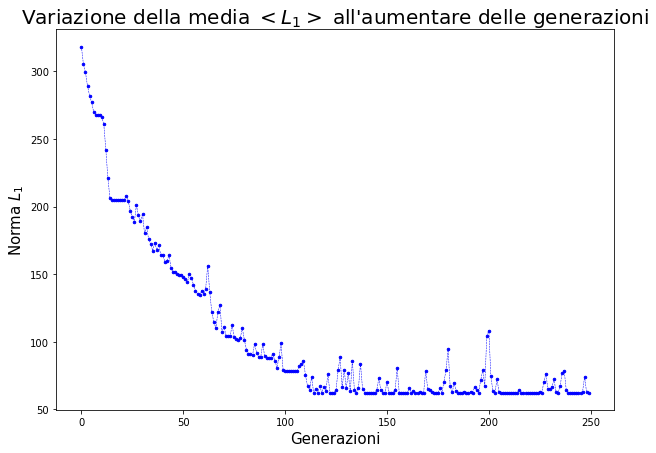

In [7]:
plt.figure(figsize=(10,7))
gen, mean_L1 = np.loadtxt("250 gen/meanL1.dat", usecols = (0,1), unpack = True)
plt.plot(gen, mean_L1,'.--', color = "b", markersize = 5., linewidth = 0.5)

plt.xlabel("Generazioni", fontsize = 15)
plt.ylabel("Norma $L_1$", fontsize = 15)
plt.title("Variazione della media $<L_1>$ all'aumentare delle generazioni", fontsize = 20)
plt.show()

#### Città poste all'interno di un quadrato

Si è applicato lo stesso procedimento descritto in precedenza per $32$ città poste all'interno di un quadrato con lato unitario. Il best path relativo alla popolazione iniziale è il seguente:

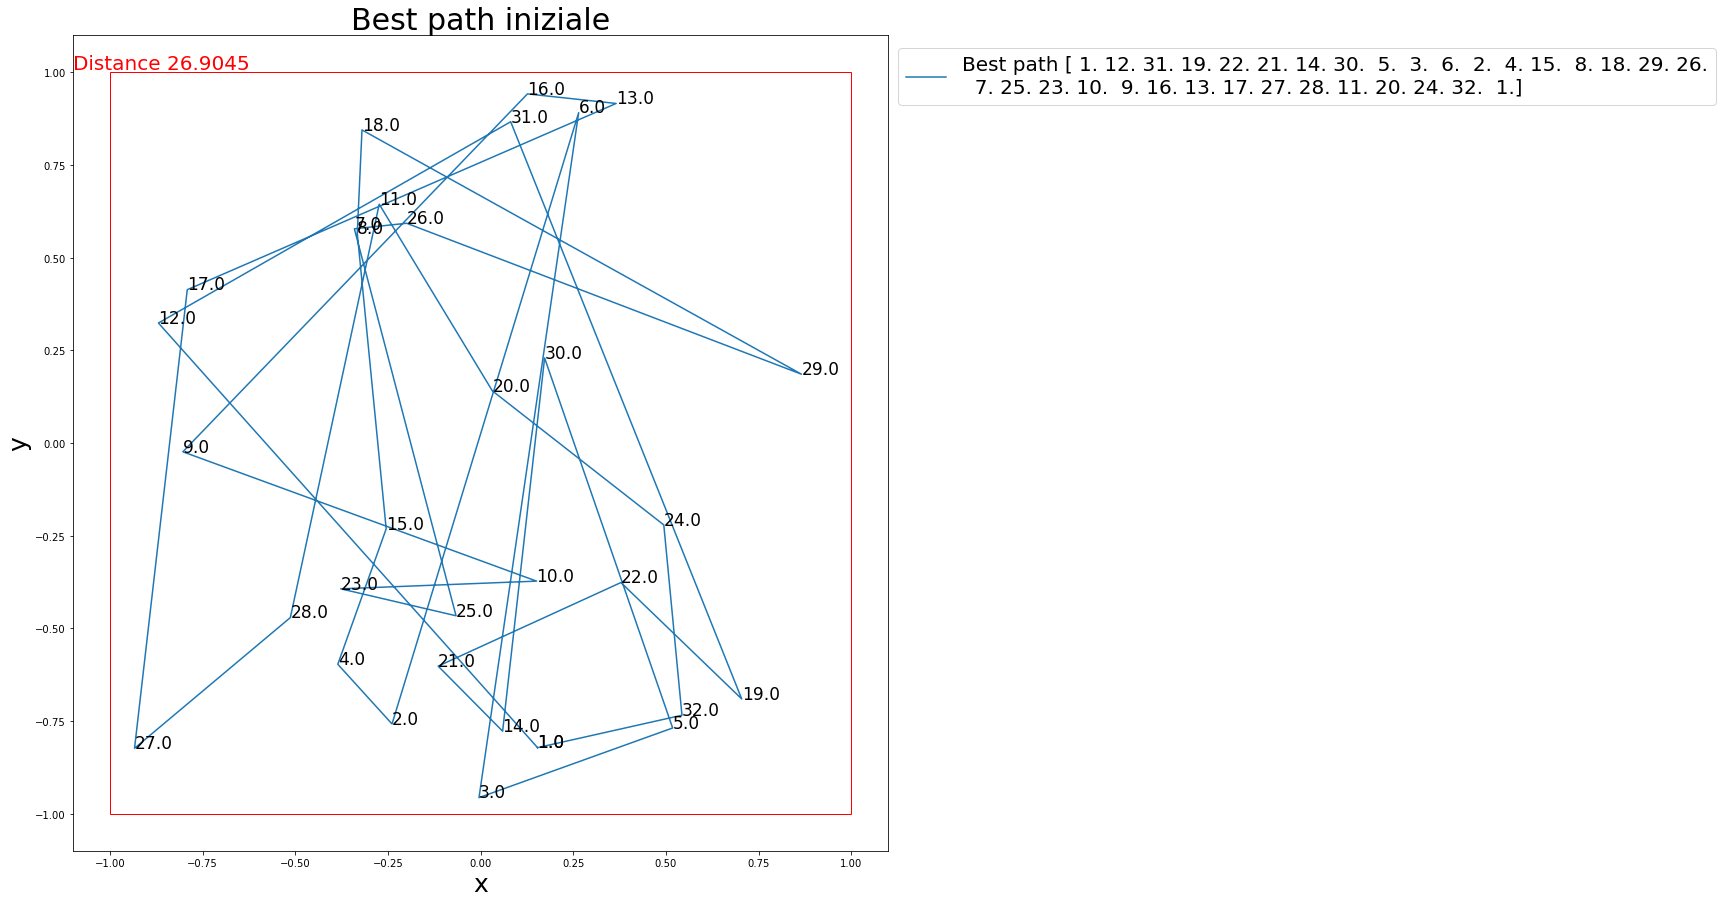

In [8]:
plt.figure(figsize=(15,15))
coord_x, coord_y, name, dist = np.loadtxt("oldpath_square.dat", usecols = (0, 1, 2, 3), delimiter = ' ', unpack = 'True')

rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("Best path iniziale", fontsize = 30)

plt.show()


Al variare delle generazioni si hanno i seguenti miglioramenti nel percorso:

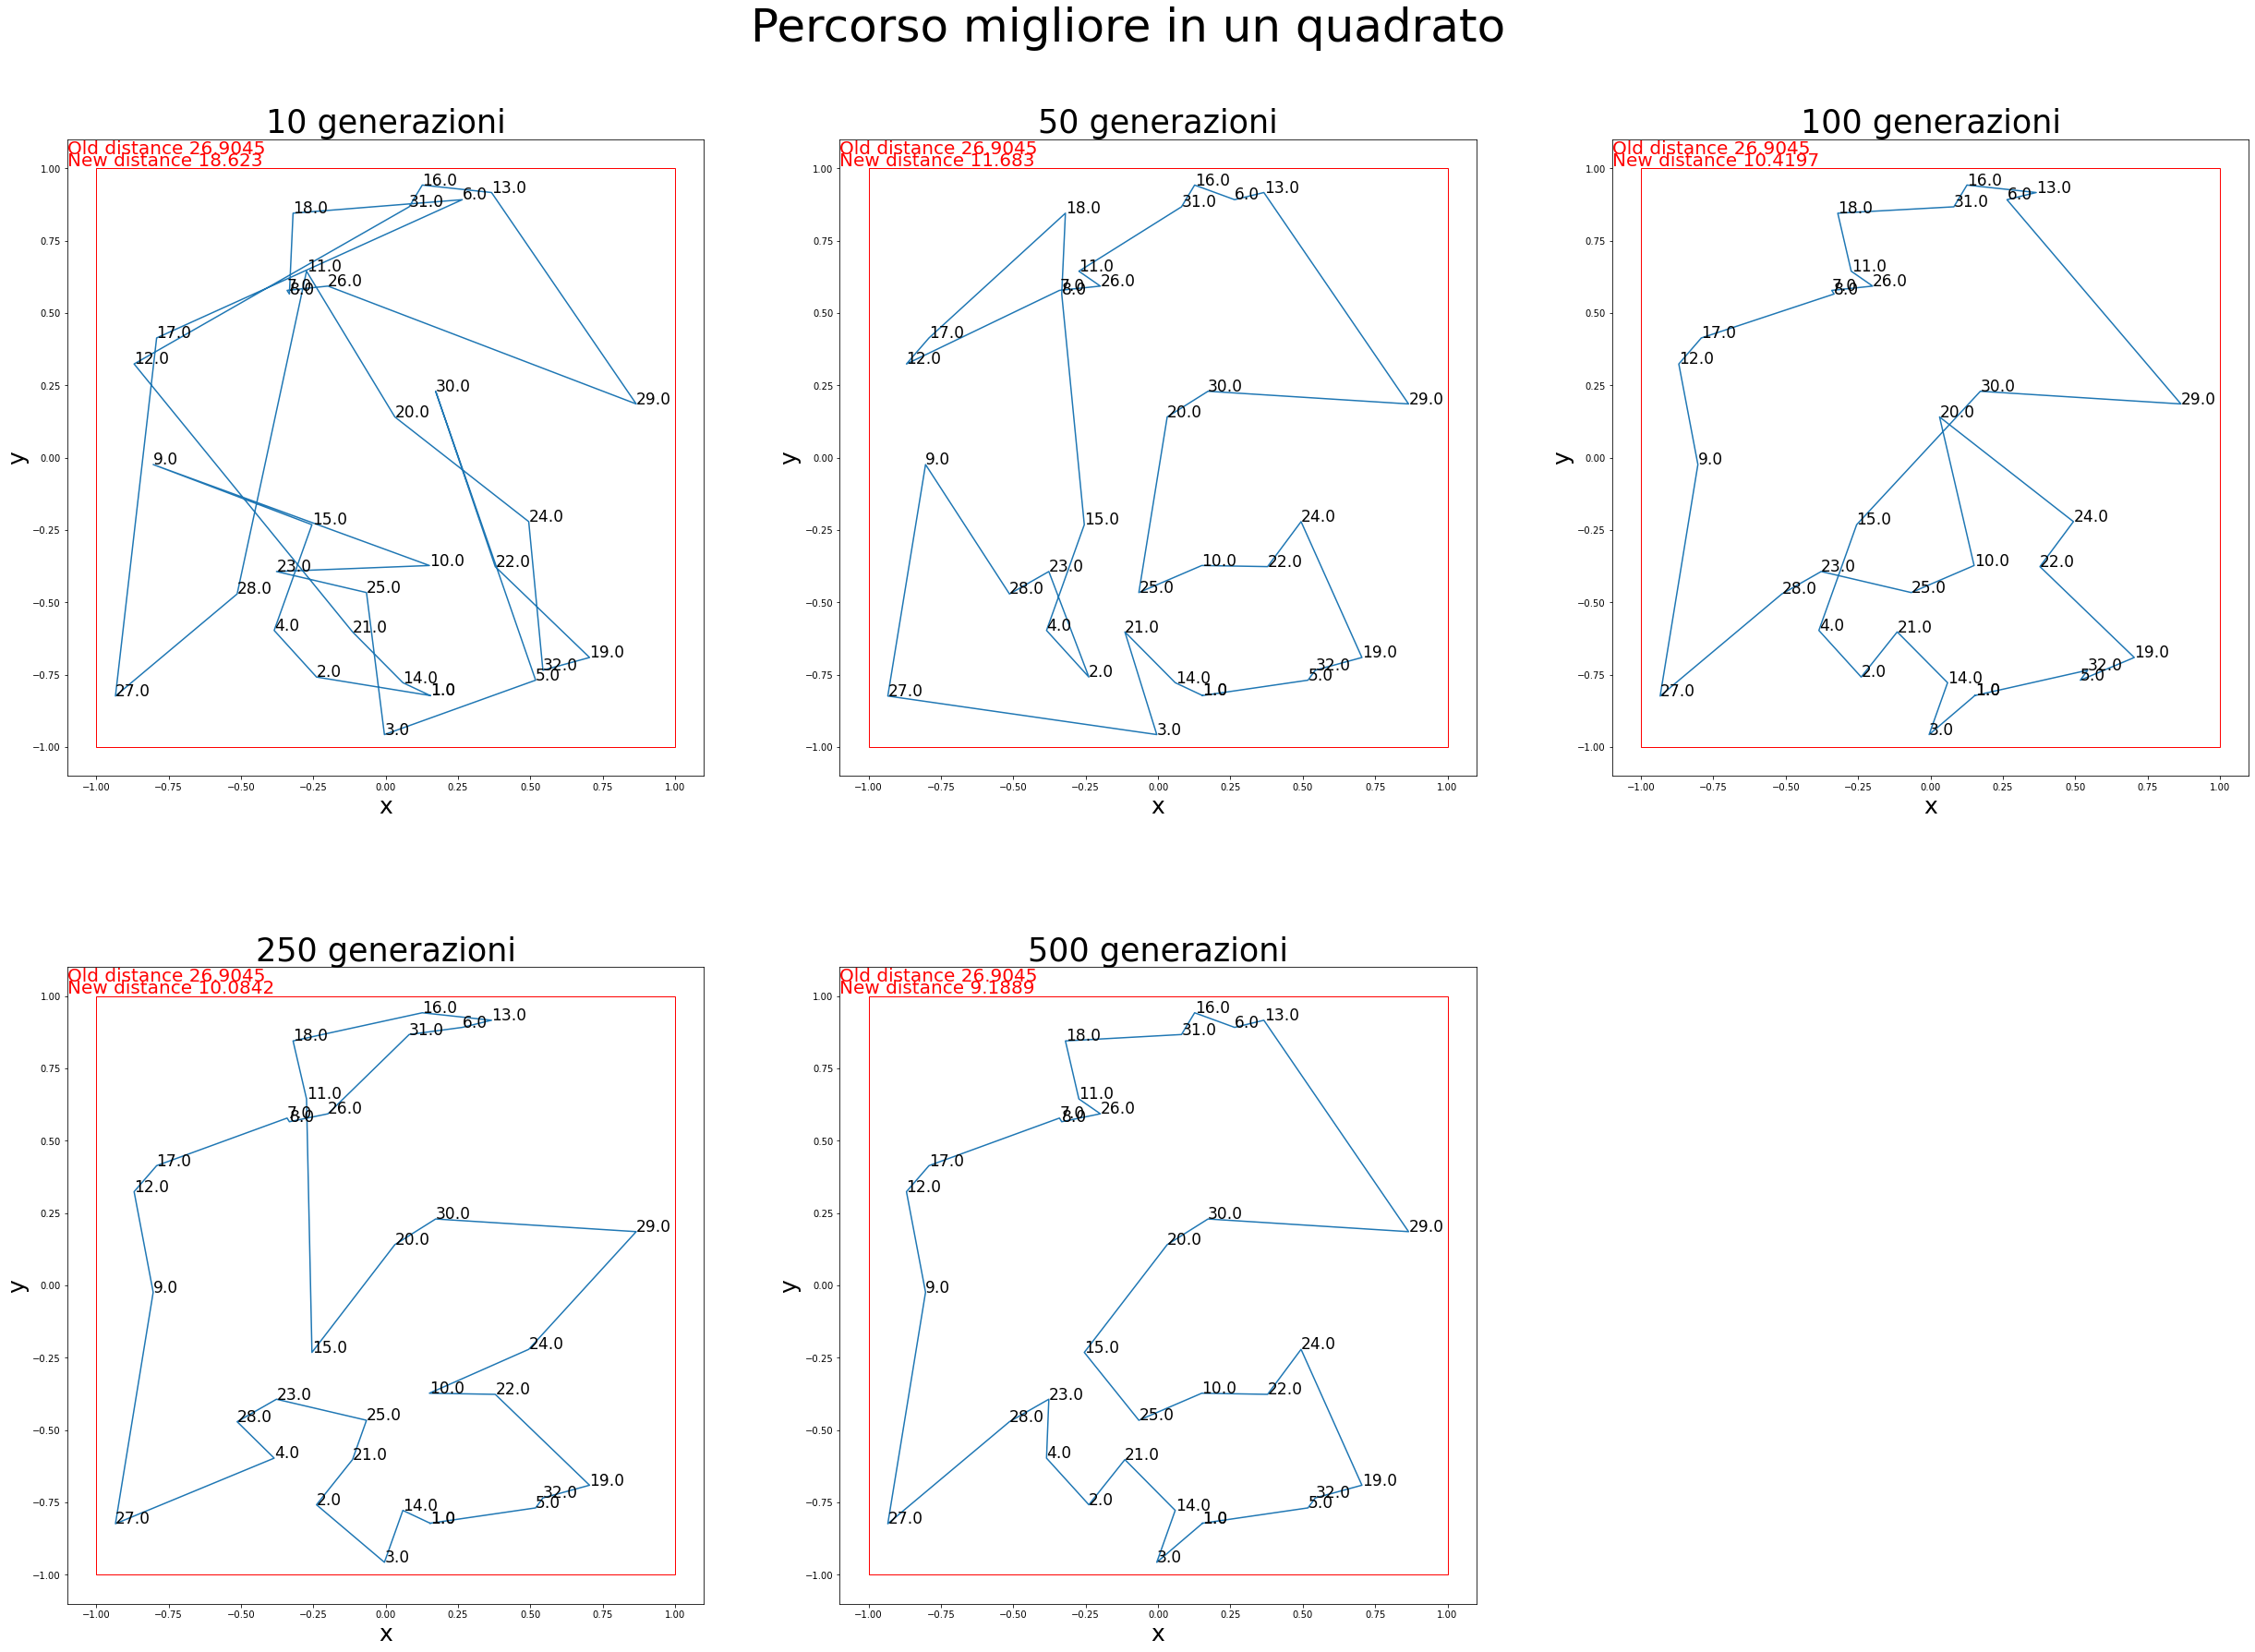

In [15]:
plt.figure(figsize=(35,25))

plt.subplot(2,3,1)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("10 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("10 generazioni", fontsize = 35)

plt.subplot(2,3,2)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("50 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("50 generazioni", fontsize = 35)


plt.subplot(2,3,3)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("100 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("100 generazioni", fontsize = 35)


plt.subplot(2,3,4)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("250 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("250 generazioni", fontsize = 35)

plt.subplot(2,3,5)
coord_x, coord_y, name, dist, old_dist = np.loadtxt("500 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')
rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

#plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("500 generazioni", fontsize = 35)


plt.suptitle("Percorso migliore in un quadrato", fontsize = 50)
plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.3)
plt.show()

Nel caso di città poste in un quadrato, dopo $250$ generazioni non si è ancora raggiunto il minimo globale del sistema; dopo $500$ generazioni si ottiene il seguente percorso minimo:

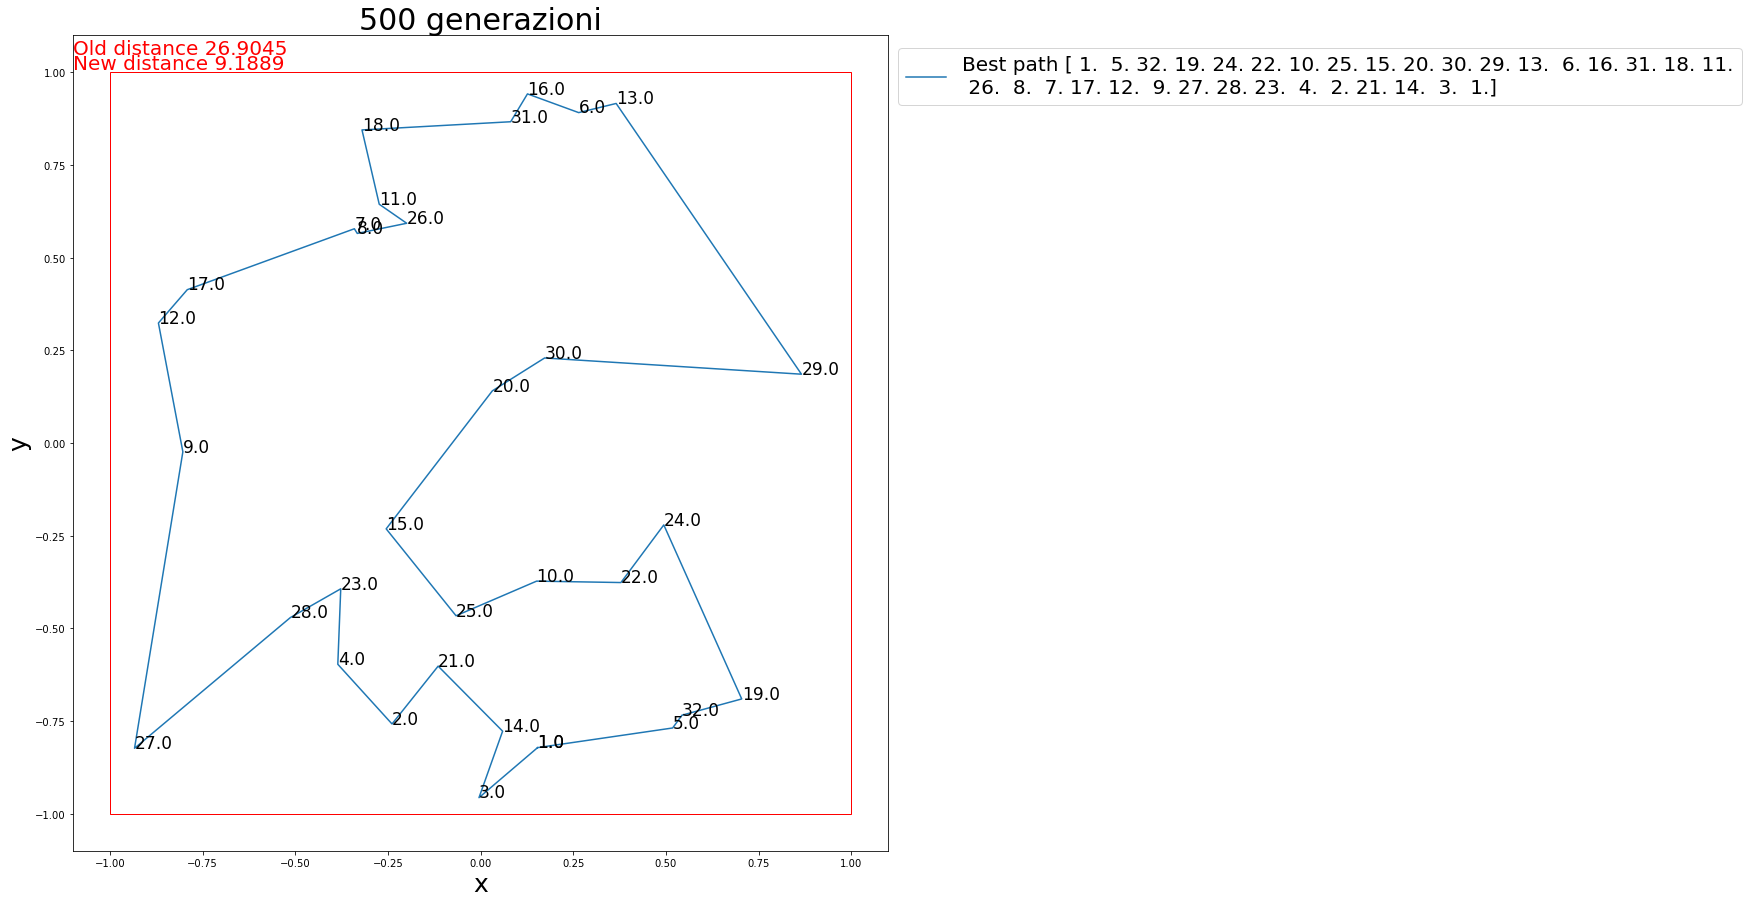

In [17]:
plt.figure(figsize=(15,15))
coord_x, coord_y, name, dist, old_dist = np.loadtxt("500 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')

rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("500 generazioni", fontsize = 30)

plt.show()


Esso tuttavia non rappresenta ancora il minimo globale del sistema. Per raggiungerlo bisogna aumentare il numero di generazioni fino a $800$

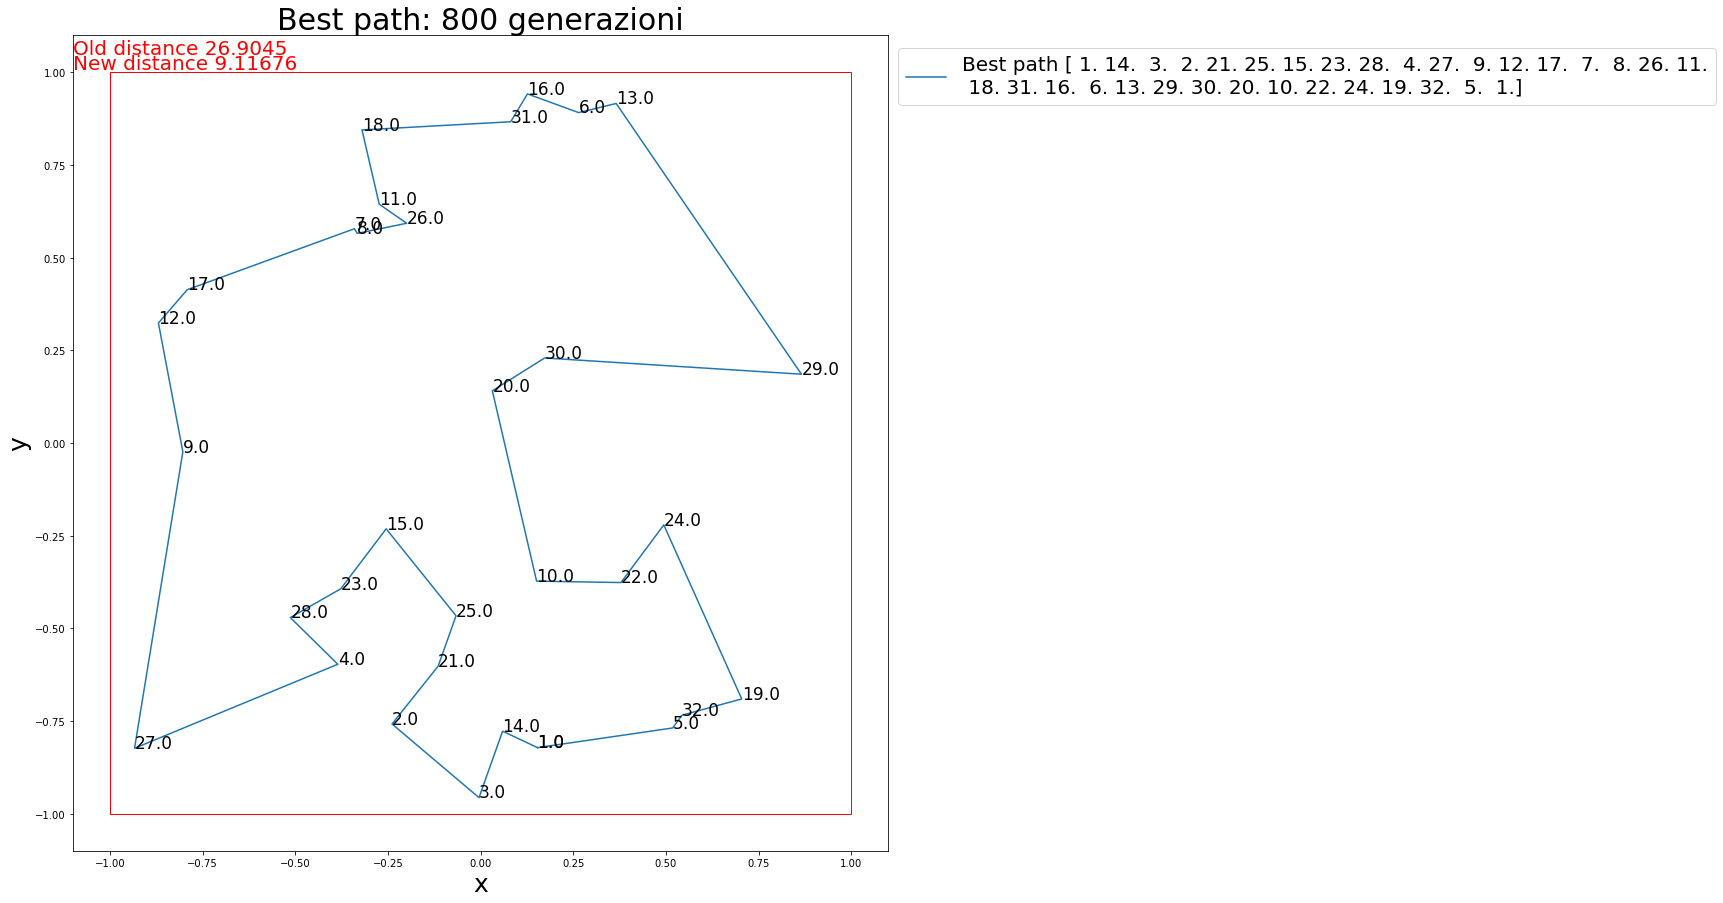

In [5]:
plt.figure(figsize=(15,15))
coord_x, coord_y, name, dist, old_dist = np.loadtxt("800 gen/bestpath_square.dat", usecols = (0, 1, 2, 3, 4), delimiter = ' ', unpack = 'True')

rectangle = plt.Rectangle((-1.,-1.), 2, 2, ec="red", fill = False)
plt.gca().add_patch(rectangle)
plt.axis('scaled')
plt.plot(coord_x, coord_y, label="Best path {}".format(name))
for i, txt in enumerate(name):
    plt.annotate(txt, (coord_x[i], coord_y[i]), fontsize = 17)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.95), fontsize = 20)

plt.xlabel("x", fontsize = 25)
plt.ylabel("y", fontsize = 25)
plt.annotate("Old distance {}".format(old_dist[0]), (-1.1,1.05), fontsize = 20, color = "red")
plt.annotate("New distance {}".format(dist[0]), (-1.1, 1.009), fontsize = 20, color = "red")
plt.title("Best path: 800 generazioni", fontsize = 30)

plt.show()

La cost function relativa alla distanza percorsa, pari a $L_1 = 26,9045$ per il percorso migliore della popolazione iniziale, è stata minimizzata fino a $L_1 = 9,11676$ per il miglior percorso ottenuto dopo $800$ generazioni. Anche in questo caso sono drasticamente diminuiti gli incroci compiuti durante il percorso. Rispetto al caso di città poste su circonferenza, si ha un rischio maggiore di rimanere incastrati in minimi locali del sistema e non riuscire a raggiungere il minimo globale.

Si è studiata inoltre l'ottimizzazione della cost function plottando $L_1$ del percorso migliore e $\langle L_1 \rangle$, mediata sulla metà migliore della popolazione, all'aumentare delle generazioni.

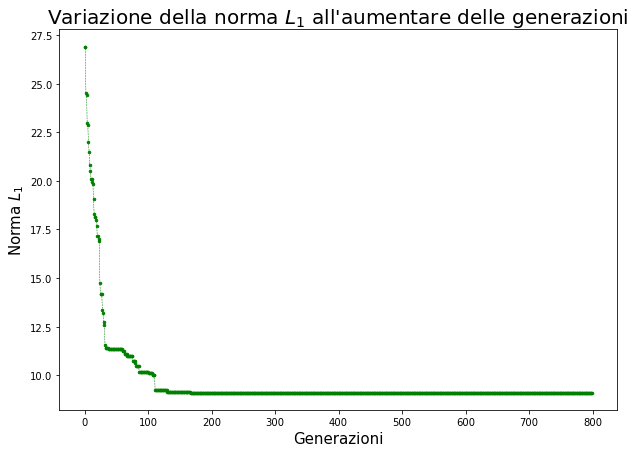

In [6]:
plt.figure(figsize=(10,7))
gen, L1 = np.loadtxt("800 gen/L1_square.dat", usecols = (0, 1), unpack = True)
plt.plot(gen, L1, '.--', color = "g", markersize = 5., linewidth = 0.5)

plt.xlabel("Generazioni", fontsize = 15)
plt.ylabel("Norma $L_1$", fontsize = 15)
plt.title("Variazione della norma $L_1$ all'aumentare delle generazioni", fontsize = 20)
plt.show()

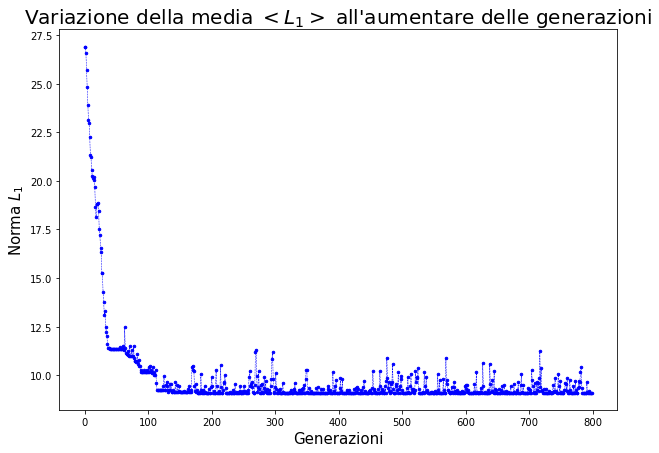

In [7]:
plt.figure(figsize=(10,7))
gen, mean_L1 = np.loadtxt("800 gen/meanL1_square.dat", usecols = (0,1), unpack = True)
plt.plot(gen, mean_L1, '.--', color = "b", markersize = 5., linewidth = 0.5)

plt.xlabel("Generazioni", fontsize = 15)
plt.ylabel("Norma $L_1$", fontsize = 15)
plt.title("Variazione della media $<L_1>$ all'aumentare delle generazioni", fontsize = 20)
plt.show()